In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import expon, kstest, rv_discrete

from src.code.models.galton_watson import GaltonWatson
from src.code.simulation.utils import test_loi_exponentielle, plot_zn_distribution
from src.utils.utils import init_notebook
from src.config.config import seed

In [2]:
init_notebook(seed)

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [3]:
poisson_1 = stats.poisson(1)

In [4]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [5]:
nb_survivants = gp1.simule(20)

In [6]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 10 époques.


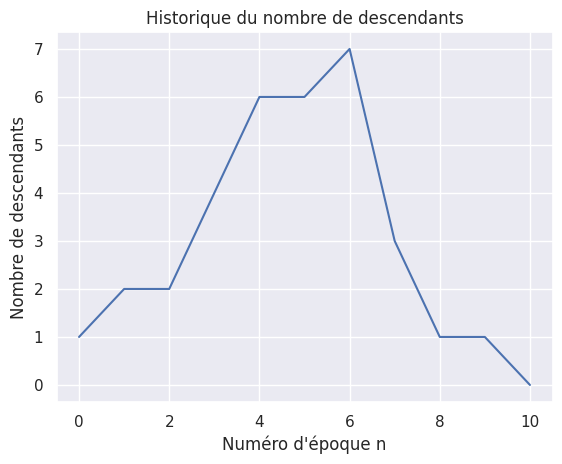

In [7]:
gp1.plot_historique_descendants()

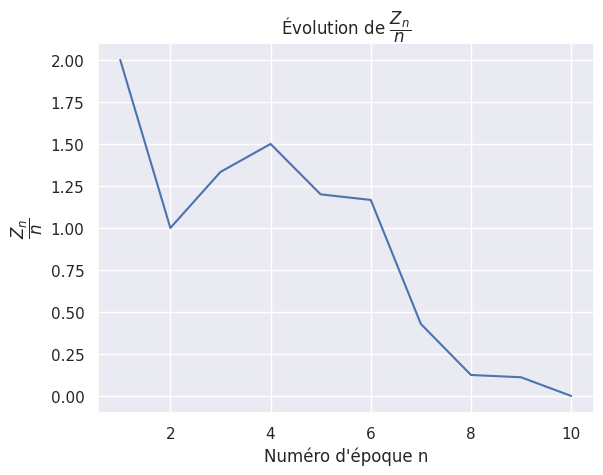

In [8]:
gp1.plot_zn_sur_n()

#### Arbre de Galton-Watson

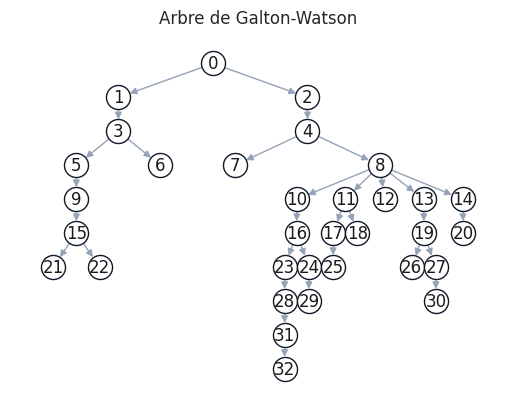

In [9]:
gp1.plot_arbre()

### λ = 2

In [10]:
poisson_2 = stats.poisson(2)

In [11]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [12]:
nb_survivants = gp2.simule(20)

In [13]:
print(f"Il reste {nb_survivants} survivants au bout de {gp2.n} époques.")

Il reste 680149 survivants au bout de 20 époques.


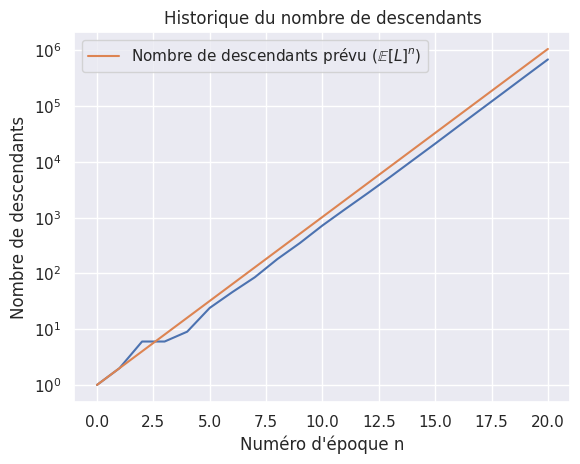

In [14]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

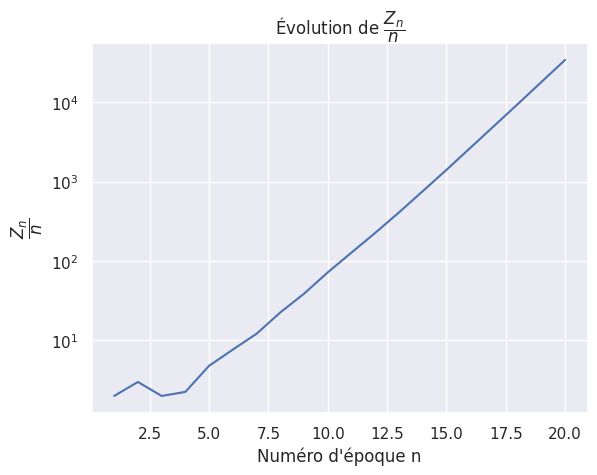

In [15]:
gp2.plot_zn_sur_n(logscale=True)

## Essais $Z_n / n$

In [80]:
nb_simulations = 10_000
nb_epoques = 100

In [81]:
simulations = gp1.lance_simulations(nb_simulations, nb_epoques)
simulations = np.array(simulations)

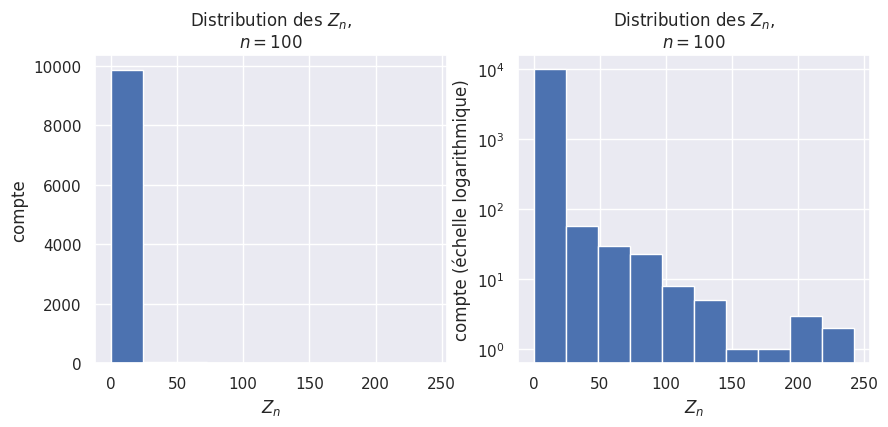

In [82]:
plot_zn_distribution(simulations, nb_epoques)

In [83]:
np.sum(simulations > 0)

222

In [84]:
zn_sup_zero = simulations[simulations > 0]

(array([94., 56., 29., 24.,  7.,  5.,  1.,  1.,  3.,  2.]),
 array([  1. ,  25.1,  49.2,  73.3,  97.4, 121.5, 145.6, 169.7, 193.8,
        217.9, 242. ]),
 <BarContainer object of 10 artists>)

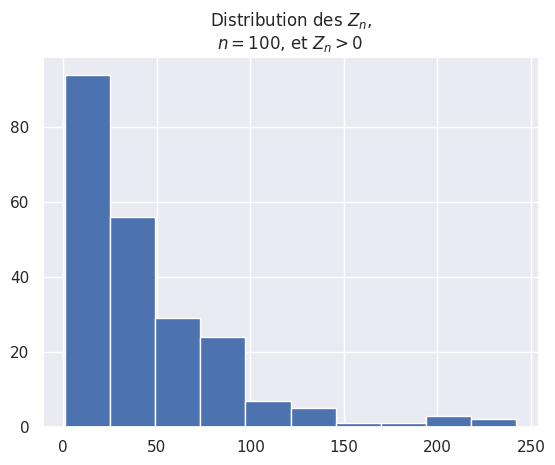

In [85]:
plt.title("Distribution des $Z_n$,\n$n = 100$, et $Z_n > 0$")
plt.hist(zn_sup_zero)

In [86]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 2.2570150467669787


In [87]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [88]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

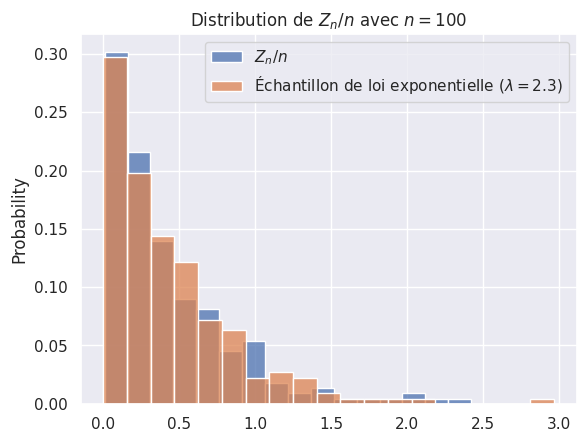

In [97]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(echantillon_expo, stat="probability",
             label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)")

plt.legend()

In [98]:
test_loi_exponentielle(zn_sup_zero / nb_epoques)

statistique_ks = 0.04452227734307462
p_value = 0.7537139831335893
Les données suivent une loi exponentielle.


0.7537139831335893

## Loi uniforme sur {0, 1, 2}

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Uniforme}}(0, 2)$.

In [48]:
uniforme2 = stats.randint(0, 3)

In [49]:
gu2 = GaltonWatson(uniforme2)
gu2

Processus Galton-Watson
- loi de reproduction L : randint
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [50]:
nb_survivants = gu2.simule(100)

In [51]:
print(f"Il reste {nb_survivants} survivants au bout de {gu2.n} époques.")

Il reste 0 survivants au bout de 5 époques.


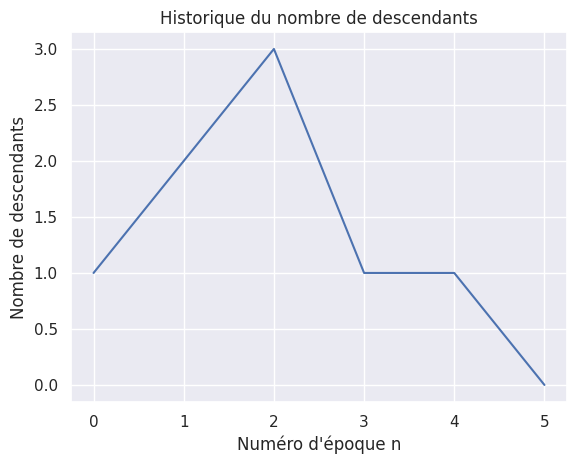

In [52]:
gu2.plot_historique_descendants()

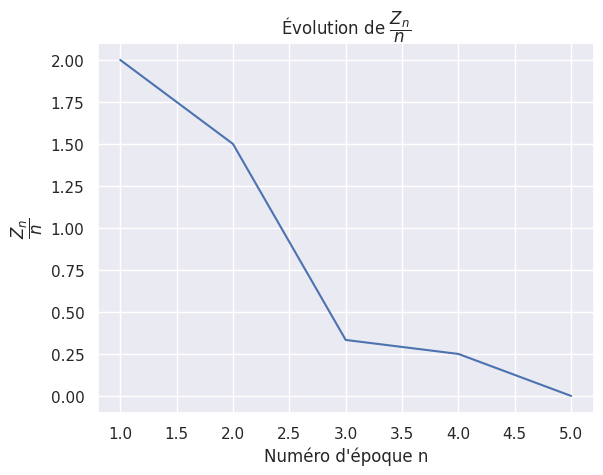

In [53]:
gu2.plot_zn_sur_n()

#### Arbre de Galton-Watson

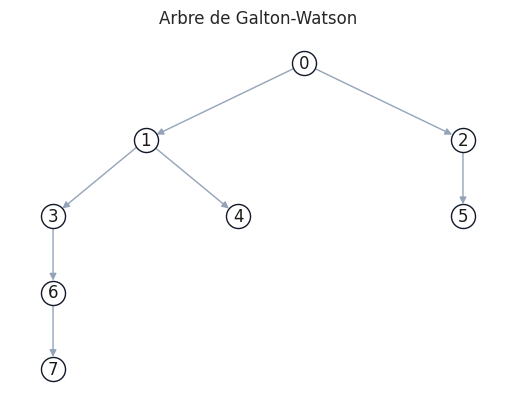

In [54]:
gu2.plot_arbre()

## Essais $Z_n / n$

In [101]:
nb_simulations = 10_000
nb_epoques = 100

simulations = gu2.lance_simulations(nb_simulations, nb_epoques)

In [102]:
simulations = np.array(simulations)

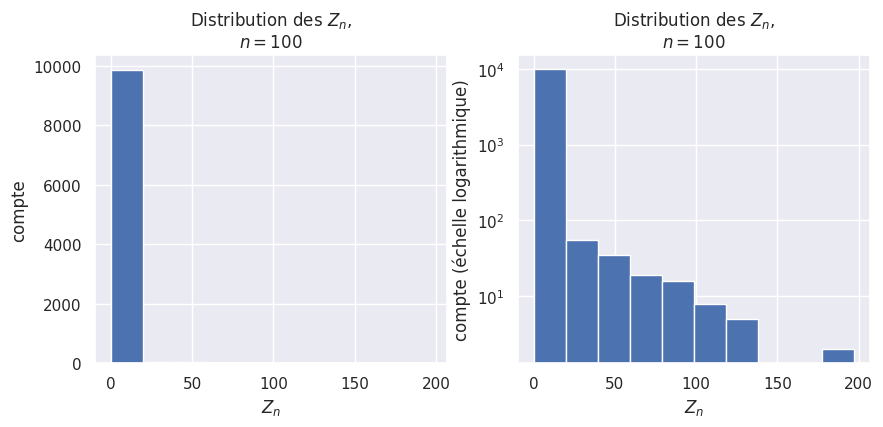

In [103]:
plot_zn_distribution(simulations, nb_epoques)

In [104]:
np.sum(simulations > 0)

249

In [105]:
zn_sup_zero = simulations[simulations > 0]

(array([114.,  52.,  33.,  21.,  14.,   8.,   5.,   0.,   0.,   2.]),
 array([  1. ,  20.6,  40.2,  59.8,  79.4,  99. , 118.6, 138.2, 157.8,
        177.4, 197. ]),
 <BarContainer object of 10 artists>)

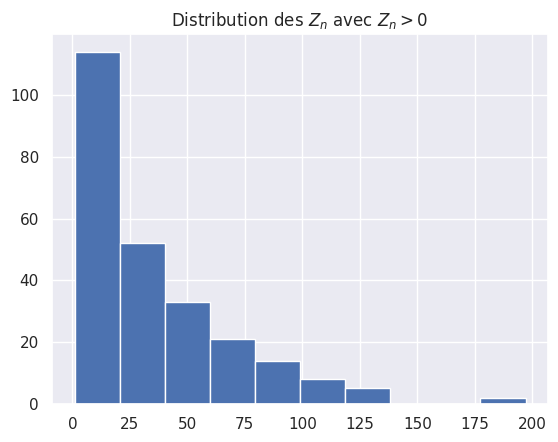

In [106]:
plt.title("Distribution des $Z_n$ avec $Z_n > 0$")
plt.hist(zn_sup_zero)

In [107]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 2.7734462018266877


In [108]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [109]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

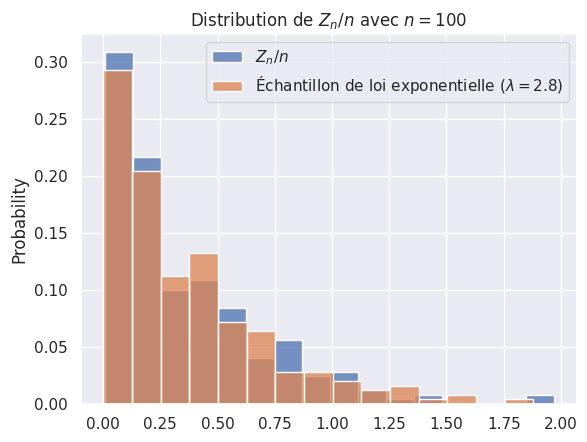

In [110]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(echantillon_expo, stat="probability",
             label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)")

plt.legend()

In [113]:
p_value = test_loi_exponentielle(zn_sup_zero / nb_epoques)

statistique_ks = 0.06148380719322444
p_value = 0.29129694989538424
Les données suivent une loi exponentielle.


## Expérimentations

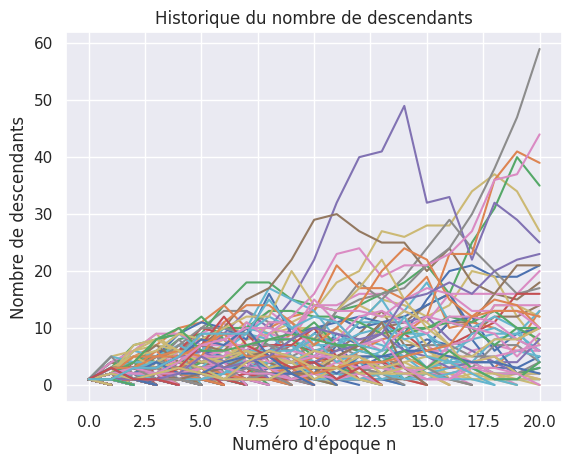

In [69]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_historique_descendants()

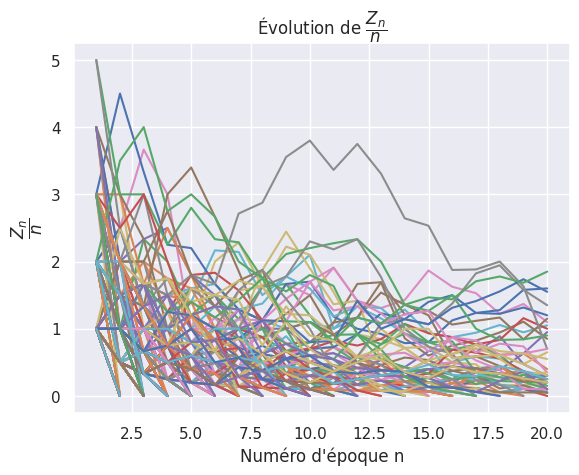

In [70]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_zn_sur_n()